<a href="https://colab.research.google.com/github/ManishInde/sy/blob/main/Combined_Bot_Iot_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔍 IoT Botnet Attack Detection using ML
This notebook uses the **UNSW 2018 IoT Botnet dataset** to detect various attack types in IoT networks using Machine Learning. We explore data preprocessing, feature selection (filter, wrapper, and embedded methods), and train a classification model using Gradient Boosting.


## 📂 About the Dataset
The UNSW 2018 IoT Botnet dataset is a labeled network traffic dataset from IoT devices (fridge, weather station, garage door, etc.) generated using real malware tools in a controlled environment. It includes various cyberattacks like DDoS, DoS, Data Theft, Reconnaissance, etc., and is commonly used for network intrusion detection.

We use 4 split files and merge them into a single DataFrame for analysis.


In [1]:
import pandas as pd
import os

# Set your local dataset paths here
file_paths = [
    "/content/UNSW_2018_IoT_Botnet_Full5pc_1.csv",
    "/content/UNSW_2018_IoT_Botnet_Full5pc_2.csv",
    "/content/UNSW_2018_IoT_Botnet_Full5pc_3.csv",
    "/content/UNSW_2018_IoT_Botnet_Full5pc_4.csv"
]

# Load and display each dataset (optional)
datasets = []
for path in file_paths:
    df = pd.read_csv(path)
    print(f"\n--- {os.path.basename(path)} ---")
    print(df.head())
    datasets.append(df)

# Concatenate all datasets vertically (stacked on top of each other)
combined_df = pd.concat(datasets, ignore_index=True)

# Display the shape and sample of combined dataframe
print("\n✅ Combined Dataset:")
print(combined_df.shape)
print(combined_df.head())


<ipython-input-1-6af9ad7d6ab9>:15: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)



--- UNSW_2018_IoT_Botnet_Full5pc_1.csv ---
   pkSeqID         stime flgs  flgs_number proto  proto_number  \
0        1  1.528089e+09    e            1   tcp             1   
1        2  1.528089e+09    e            1   arp             2   
2        3  1.528089e+09    e            1   tcp             1   
3        4  1.528089e+09    e            1   tcp             1   
4        5  1.528089e+09    e            1   tcp             1   

             saddr  sport            daddr dport  ...  AR_P_Proto_P_DstIP  \
0  192.168.100.147  49960    192.168.100.7    80  ...             1.12704   
1    192.168.100.7     -1  192.168.100.147    -1  ...         15267.20000   
2  192.168.100.147  49962    192.168.100.7    80  ...             1.12704   
3  192.168.100.147  49964    192.168.100.7    80  ...             1.12704   
4  192.168.100.147  49966    192.168.100.7    80  ...             1.12704   

   N_IN_Conn_P_DstIP N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  \
0                 96              

<ipython-input-1-6af9ad7d6ab9>:15: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)



--- UNSW_2018_IoT_Botnet_Full5pc_2.csv ---
   pkSeqID         stime flgs  flgs_number proto  proto_number  \
0  1000001  1.528085e+09    e            1   udp             3   
1  1000002  1.528085e+09    e            1   udp             3   
2  1000003  1.528085e+09    e            1   udp             3   
3  1000004  1.528085e+09    e            1   udp             3   
4  1000005  1.528085e+09    e            1   udp             3   

             saddr  sport          daddr dport  ...  AR_P_Proto_P_DstIP  \
0  192.168.100.148  37153  192.168.100.6    80  ...            0.319943   
1  192.168.100.148  37154  192.168.100.6    80  ...            0.319943   
2  192.168.100.148  37155  192.168.100.6    80  ...            0.319943   
3  192.168.100.148  37156  192.168.100.6    80  ...            0.319943   
4  192.168.100.148  37157  192.168.100.6    80  ...            0.319943   

   N_IN_Conn_P_DstIP N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  \
0                100               100        

<ipython-input-1-6af9ad7d6ab9>:15: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)



--- UNSW_2018_IoT_Botnet_Full5pc_3.csv ---
   pkSeqID         stime flgs  flgs_number proto  proto_number  \
0  2000001  1.528096e+09  e s            2   tcp             1   
1  2000002  1.528096e+09  e s            2   tcp             1   
2  2000003  1.528096e+09  e s            2   tcp             1   
3  2000004  1.528096e+09  e s            2   tcp             1   
4  2000005  1.528096e+09  e s            2   tcp             1   

             saddr  sport          daddr dport  ...  AR_P_Proto_P_DstIP  \
0  192.168.100.148  64480  192.168.100.3    80  ...            0.326786   
1  192.168.100.148  64481  192.168.100.3    80  ...            0.326786   
2  192.168.100.148  64484  192.168.100.3    80  ...            0.326786   
3  192.168.100.148  64485  192.168.100.3    80  ...            0.326786   
4  192.168.100.148  64490  192.168.100.3    80  ...            0.326786   

   N_IN_Conn_P_DstIP N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  \
0                100                46        

<ipython-input-1-6af9ad7d6ab9>:15: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)



--- UNSW_2018_IoT_Botnet_Full5pc_4.csv ---
   pkSeqID         stime flgs  flgs_number proto  proto_number  \
0  3000001  1.528099e+09    e            1   udp             3   
1  3000002  1.528099e+09    e            1   udp             3   
2  3000003  1.528099e+09    e            1   udp             3   
3  3000004  1.528099e+09    e            1   udp             3   
4  3000005  1.528099e+09    e            1   udp             3   

             saddr sport          daddr dport  ...  AR_P_Proto_P_DstIP  \
0  192.168.100.147  6226  192.168.100.3    80  ...             1.09825   
1  192.168.100.147  6227  192.168.100.3    80  ...             1.09825   
2  192.168.100.147  6228  192.168.100.3    80  ...             1.09825   
3  192.168.100.147  6229  192.168.100.3    80  ...             1.09825   
4  192.168.100.147  6230  192.168.100.3    80  ...             1.09825   

   N_IN_Conn_P_DstIP N_IN_Conn_P_SrcIP  AR_P_Proto_P_Sport  \
0                100               100             1

In [2]:
combined_df.describe()
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668522 entries, 0 to 3668521
Data columns (total 46 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   pkSeqID                           int64  
 1   stime                             float64
 2   flgs                              object 
 3   flgs_number                       int64  
 4   proto                             object 
 5   proto_number                      int64  
 6   saddr                             object 
 7   sport                             object 
 8   daddr                             object 
 9   dport                             object 
 10  pkts                              int64  
 11  bytes                             int64  
 12  state                             object 
 13  state_number                      int64  
 14  ltime                             float64
 15  seq                               int64  
 16  dur                               fl

## 🧹 Data Cleaning & Preparation
We remove unnecessary columns, handle missing values, and apply label encoding to convert categorical data into numerical form.


In [3]:
# Drop rows with missing values
cleaned_df = combined_df.dropna()


# Use this if the column is named "subcategory" with a space
cols_to_drop = ['pkSeqID', 'category', 'subcategory']


# cols_to_drop = ['pkSeqID', 'category', 'subcategory']

cleaned_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print("✅ Columns dropped successfully")
print("Remaining columns:\n", cleaned_df.columns)



# Optionally reset index
cleaned_df.reset_index(drop=True, inplace=True)

print("✅ After cleaning:")
print("Shape:", cleaned_df.shape)


✅ Columns dropped successfully
Remaining columns:
 Index(['stime', 'flgs', 'flgs_number', 'proto', 'proto_number', 'saddr',
       'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state', 'state_number',
       'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min', 'max', 'spkts',
       'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate', 'TnBPSrcIP',
       'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack'],
      dtype='object')
✅ After cleaning:
Shape: (3668522, 43)


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in cleaned_df.select_dtypes(include=['object', 'category']).columns:
    cleaned_df[column] = cleaned_df[column].astype(str)  # Ensure all values are strings
    le = LabelEncoder()
    cleaned_df[column] = le.fit_transform(cleaned_df[column])
    label_encoders[column] = le

print("✅ Label encoding complete")
print(cleaned_df.head())



✅ Label encoding complete
          stime  flgs  flgs_number  proto  proto_number  saddr  sport  daddr  \
0  1.528089e+09     0            1      3             1      1  44407     21   
1  1.528089e+09     0            1      0             2     12      0     10   
2  1.528089e+09     0            1      3             1      1  44409     21   
3  1.528089e+09     0            1      3             1      1  44411     21   
4  1.528089e+09     0            1      3             1      1  44413     21   

   dport  pkts  ...  TnP_Per_Dport  AR_P_Proto_P_SrcIP  AR_P_Proto_P_DstIP  \
0   6650     8  ...            772            1.142970             1.12704   
1      0     2  ...              8            0.003857         15267.20000   
2   6650     8  ...            772            1.142970             1.12704   
3   6650     8  ...            772            1.142970             1.12704   
4   6650     8  ...            772            1.142970             1.12704   

   N_IN_Conn_P_DstIP  N_

<ipython-input-5-54650a25c1b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='attack', data=combined_df, order=combined_df['attack'].value_counts().index, palette='Set1')


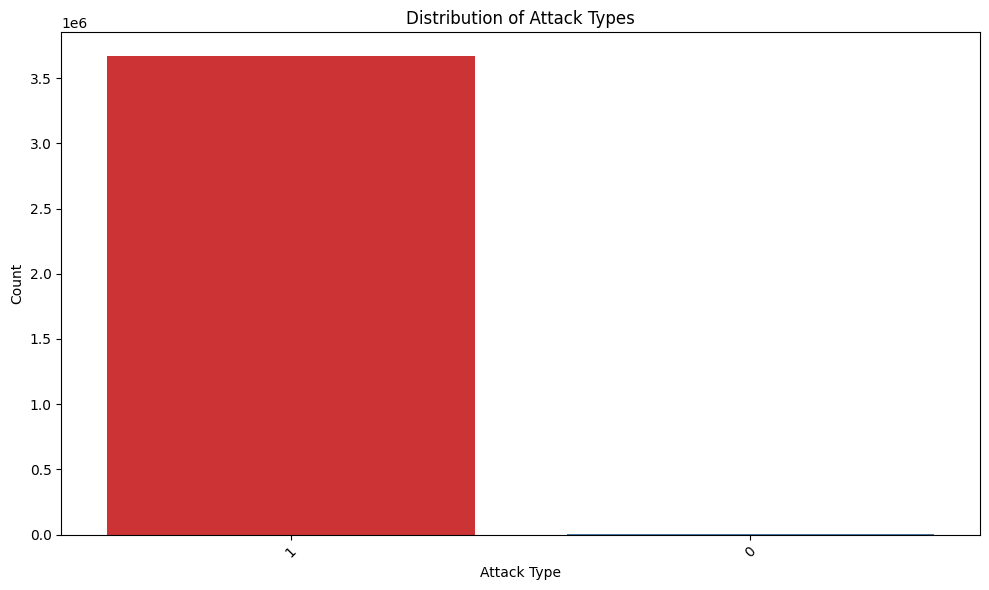

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of attack types
plt.figure(figsize=(10,6))
sns.countplot(x='attack', data=combined_df, order=combined_df['attack'].value_counts().index, palette='Set1')
plt.title("Distribution of Attack Types")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## ⚖️ Balancing the Dataset
To prevent model bias, we balance the dataset using undersampling to ensure equal representation of each attack type.


In [6]:
from sklearn.utils import resample

# Replace 'label' with your actual target column
target_col = "attack"

# Split the DataFrame by class
grouped = [group for _, group in cleaned_df.groupby(target_col)]

# Find the minimum class count
min_count = min(len(group) for group in grouped)

# Resample each group to the same size
balanced_samples = [
    resample(group, replace=False, n_samples=min_count, random_state=42)
    for group in grouped
]

# Combine the balanced groups
balanced_df = pd.concat(balanced_samples).sample(frac=1, random_state=42).reset_index(drop=True)

print("✅ Balanced sampling complete")
print("Each class count:\n", balanced_df[target_col].value_counts())
print("Shape:", balanced_df.shape)


✅ Balanced sampling complete
Each class count:
 attack
0    477
1    477
Name: count, dtype: int64
Shape: (954, 43)


## 📏 Feature Scaling
Standardize all numeric features using StandardScaler to bring them to the same scale.


In [8]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Replace sampled_df with your actual DataFrame name
X = balanced_df.iloc[:, :-1]
y = balanced_df.iloc[:, -1]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Feature scaling done")
print(pd.DataFrame(X_scaled).head())


✅ Feature scaling done
         0         1         2         3         4         5         6   \
0 -0.983581 -0.498542 -0.366852 -0.542641 -1.546798  2.346559  1.491021   
1 -0.977550 -0.498542 -0.366852  0.529160  0.628066  0.382285  0.731868   
2  1.015790 -0.498542 -0.366852  0.529160  0.628066  0.054906  1.541865   
3  1.032270 -0.498542 -0.366852  0.529160  0.628066  0.054906 -1.612485   
4 -0.974639 -0.498542 -0.366852  0.529160  0.628066  0.709664 -0.791568   

         7         8         9   ...        32        33        34        35  \
0 -0.598949  0.655380  1.257095  ...  2.521323  7.124962 -0.130763 -0.089177   
1  1.686640 -0.161310 -0.168084  ...  1.039778 -0.184567  0.496215 -0.090041   
2 -0.598949  0.655380 -0.165817  ... -0.686616 -0.134442 -0.132559 -0.089975   
3 -0.598949  0.655380 -0.167092  ... -0.695022 -0.152207 -0.132590 -0.089958   
4  1.341645 -0.168318 -0.167943  ... -0.708665 -0.181637 -0.129575 -0.089452   

         36        37        38        39    

## 📊 Exploratory Data Analysis (EDA)
We visualize the distribution of attacks, feature relationships, and correlations to understand the dataset better.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set style
sns.set(style="whitegrid")


<ipython-input-10-a506c4ec0ec4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target_col, data=balanced_df, palette='Set2')


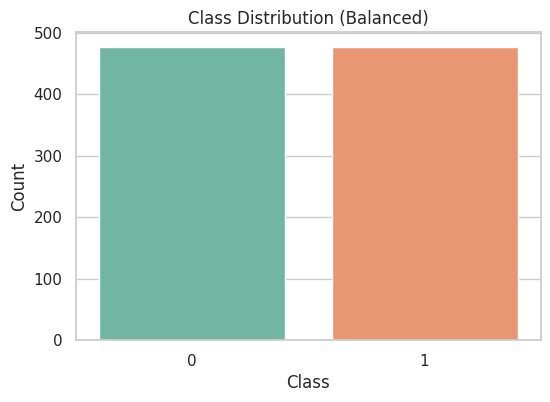

In [10]:
# Bar plot showing class distribution


plt.figure(figsize=(6,4))
sns.countplot(x=target_col, data=balanced_df, palette='Set2')
plt.title("Class Distribution (Balanced)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


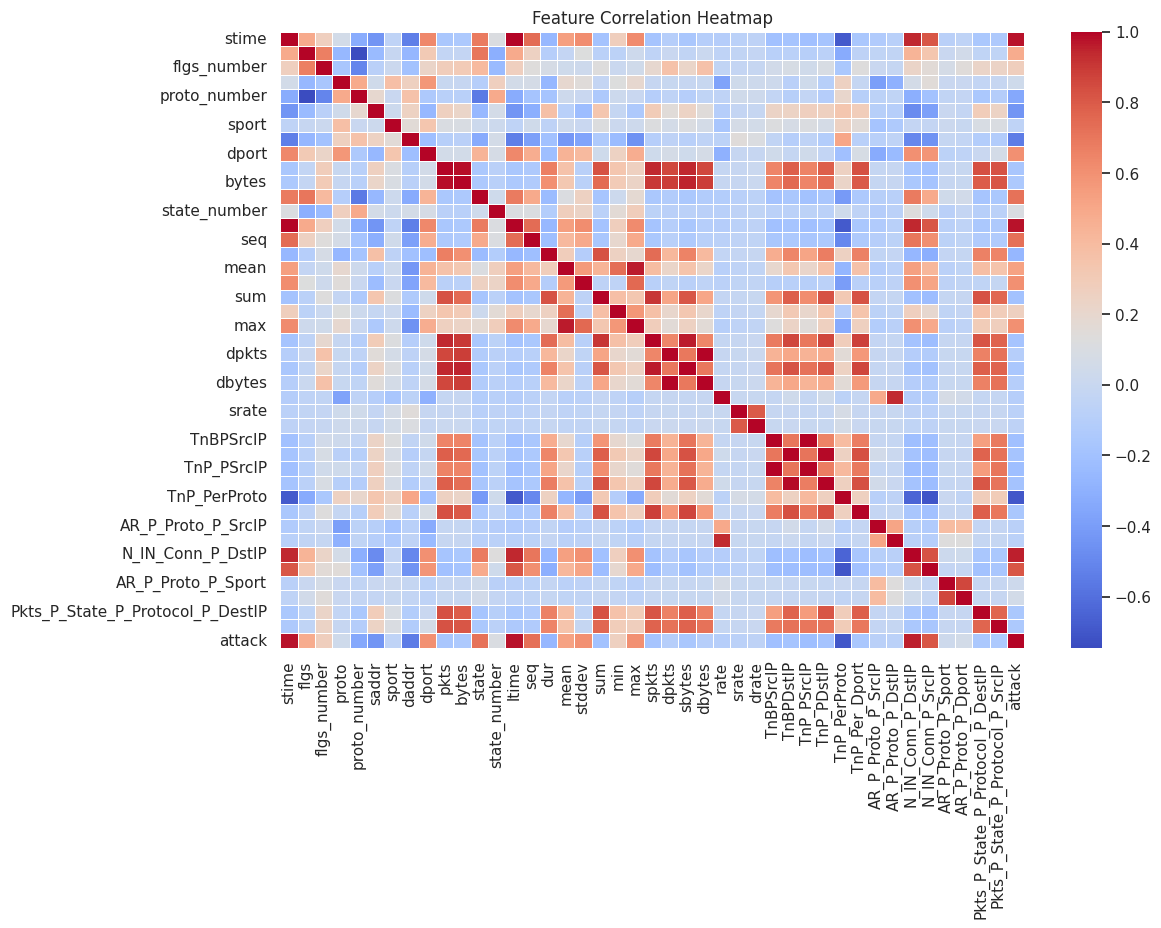

In [11]:
# Correlation heatmap of all numerical features


plt.figure(figsize=(12,8))
corr = balanced_df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


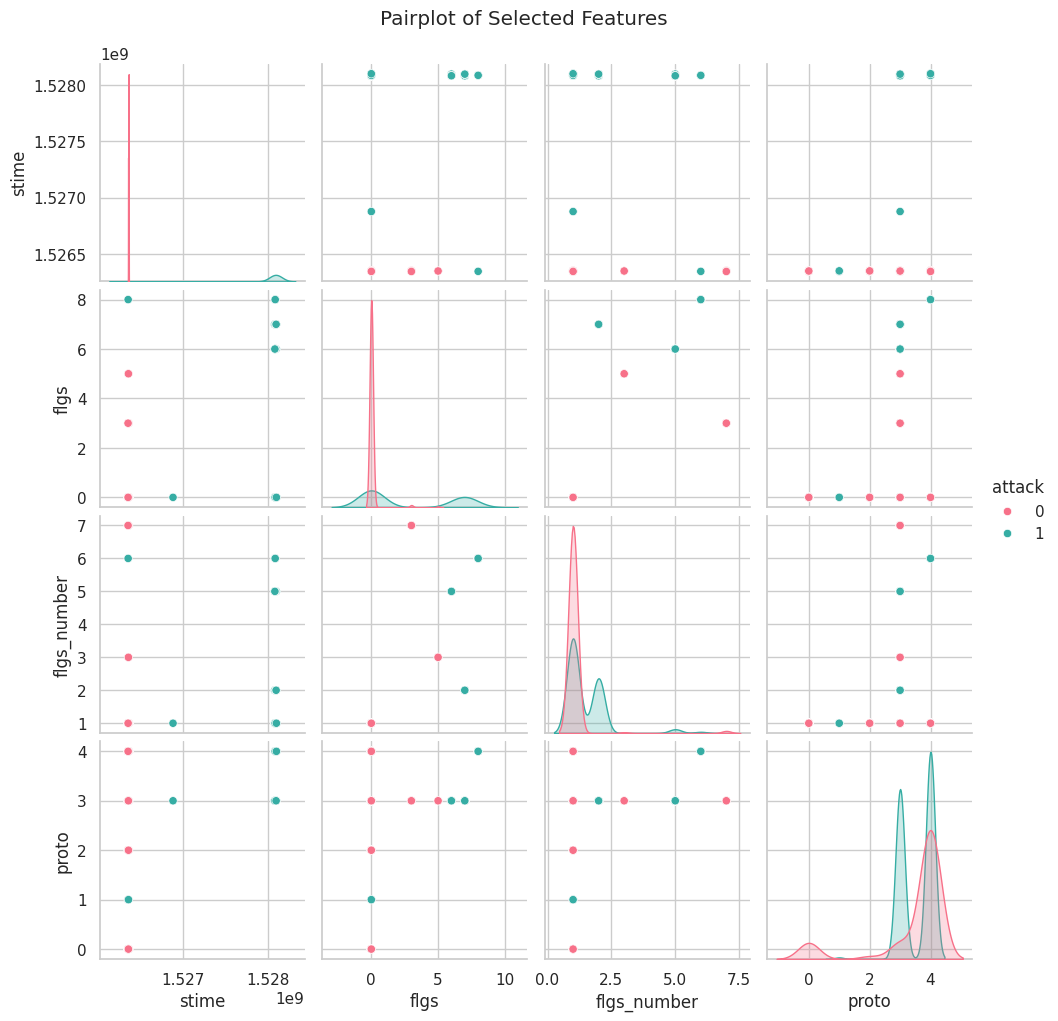

In [12]:
# Select a small number of features for pairplot
selected_features = balanced_df.columns[:4].tolist() + [target_col]

sns.pairplot(balanced_df[selected_features], hue=target_col, palette='husl')
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()


<ipython-input-13-353a8279d4a6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=target_col, y=feature, data=balanced_df, palette='Set3')


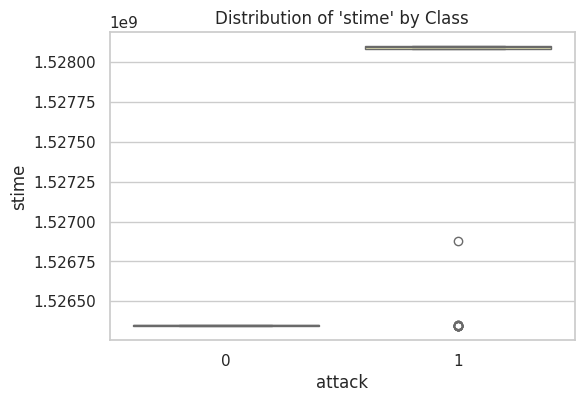

In [13]:
# 📊 Boxplot to visualize the distribution of a feature across attack classes


feature = balanced_df.columns[0]  # Change to any feature name

plt.figure(figsize=(6,4))
sns.boxplot(x=target_col, y=feature, data=balanced_df, palette='Set3')
plt.title(f"Distribution of '{feature}' by Class")
plt.show()


## 🧠 Feature Selection Techniques
We use three types of feature selection techniques to choose the most relevant features:
- **Filter method:** Mutual information
- **Wrapper method:** Recursive Feature Elimination (RFE)
- **Embedded method:** Feature importance from Random Forest


In [14]:
X = balanced_df.drop(columns=['attack'])
y = balanced_df['attack']


In [15]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select top 10 features
filter_selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_filter_selected = filter_selector.fit_transform(X, y)

# Get selected feature names
selected_filter_features = X.columns[filter_selector.get_support()]
print("🔹 Filter Method Selected Features:")
print(selected_filter_features)


🔹 Filter Method Selected Features:
Index(['stime', 'ltime', 'sbytes', 'TnBPSrcIP', 'TnP_PSrcIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'N_IN_Conn_P_DstIP',
       'Pkts_P_State_P_Protocol_P_DestIP'],
      dtype='object')


<ipython-input-21-da254bb73d5d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')


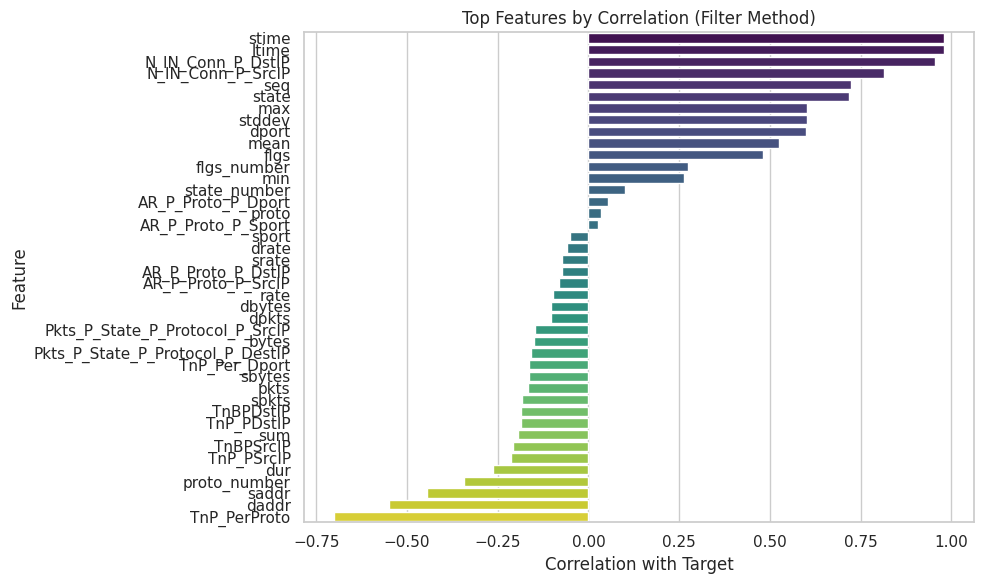

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation with target
correlation = balanced_df.corr(numeric_only=True)[target_col].drop(target_col).sort_values(ascending=False)

# Plot top N correlated features
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')
plt.title("Top Features by Correlation (Filter Method)")
plt.xlabel("Correlation with Target")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [17]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

rfe_selector = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=10)
X_wrapper_selected = rfe_selector.fit_transform(X, y)

selected_wrapper_features = X.columns[rfe_selector.get_support()]
print("🔹 Wrapper Method Selected Features:")
print(selected_wrapper_features)


🔹 Wrapper Method Selected Features:
Index(['stime', 'dport', 'ltime', 'seq', 'TnBPDstIP', 'TnP_PDstIP',
       'TnP_PerProto', 'TnP_Per_Dport', 'N_IN_Conn_P_DstIP',
       'Pkts_P_State_P_Protocol_P_DestIP'],
      dtype='object')


In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Get top 10 features based on importance
importances = model.feature_importances_
indices = importances.argsort()[::-1][:10]
selected_embedded_features = X.columns[indices]

print("🔹 Embedded Method Selected Features:")
print(selected_embedded_features)


🔹 Embedded Method Selected Features:
Index(['N_IN_Conn_P_DstIP', 'dport', 'stime', 'ltime', 'TnP_PDstIP',
       'TnBPDstIP', 'Pkts_P_State_P_Protocol_P_DestIP', 'TnP_Per_Dport',
       'AR_P_Proto_P_SrcIP', 'seq'],
      dtype='object')


## 🤖 Model Training with Gradient Boosting
Using the union of selected features from all methods, we train a Gradient Boosting Classifier to detect IoT botnet attacks.


In [27]:
print("📊 Feature Selection Summary:")
print("Filter:   ", list(selected_filter_features))
print("Wrapper:  ", list(selected_wrapper_features))
print("Embedded: ", list(selected_embedded_features))


📊 Feature Selection Summary:
Filter:    ['stime', 'ltime', 'sbytes', 'TnBPSrcIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'N_IN_Conn_P_DstIP', 'Pkts_P_State_P_Protocol_P_DestIP']
Wrapper:   ['stime', 'dport', 'ltime', 'seq', 'TnBPDstIP', 'TnP_PDstIP', 'TnP_PerProto', 'TnP_Per_Dport', 'N_IN_Conn_P_DstIP', 'Pkts_P_State_P_Protocol_P_DestIP']
Embedded:  ['N_IN_Conn_P_DstIP', 'dport', 'stime', 'ltime', 'TnP_PDstIP', 'TnBPDstIP', 'Pkts_P_State_P_Protocol_P_DestIP', 'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'seq']


In [28]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Train-Test Split Complete")
print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


✅ Train-Test Split Complete
Training set size: 763
Test set size: 191


In [29]:
# Use previously selected features (replace if needed)
best_filter = set(selected_filter_features)
best_wrapper = set(selected_wrapper_features)
best_embedded = set(selected_embedded_features)

# Union of all features
final_features = list(best_filter.union(best_wrapper).union(best_embedded))
print("🧠 Final selected features (Union):", final_features)


🧠 Final selected features (Union): ['stime', 'TnP_Per_Dport', 'TnBPDstIP', 'sbytes', 'TnP_PerProto', 'TnP_PSrcIP', 'seq', 'ltime', 'N_IN_Conn_P_DstIP', 'TnP_PDstIP', 'dport', 'TnBPSrcIP', 'AR_P_Proto_P_SrcIP', 'Pkts_P_State_P_Protocol_P_DestIP']


In [30]:
# Subset data using final features
X_final = balanced_df[final_features]
y_final = balanced_df['attack']

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

print("✅ Final Train-Test Split Complete")


✅ Final Train-Test Split Complete


## 📈 Model Evaluation
We assess performance using accuracy, classification report, and a confusion matrix to visualize predictions.


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

final_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_final, y_train_final)

y_pred_final = final_model.predict(X_test_final)

# Evaluation
final_accuracy = accuracy_score(y_test_final, y_pred_final)
print(f"🎯 Final Model Accuracy: {final_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test_final, y_pred_final))


🎯 Final Model Accuracy: 99.48%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00       108
           1       0.99      1.00      0.99        83

    accuracy                           0.99       191
   macro avg       0.99      1.00      0.99       191
weighted avg       0.99      0.99      0.99       191



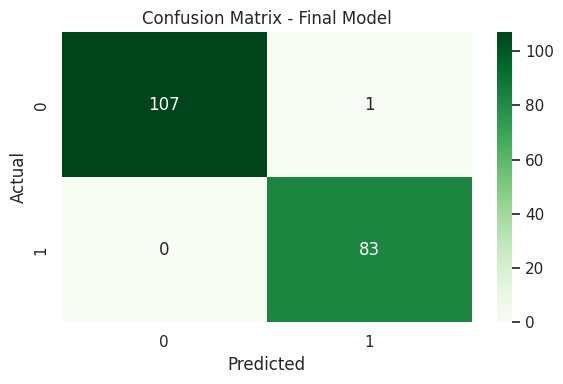

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm_final = confusion_matrix(y_test_final, y_pred_final)

plt.figure(figsize=(6,4))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Greens', xticklabels=final_model.classes_, yticklabels=final_model.classes_)
plt.title("Confusion Matrix - Final Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# ✅ Conclusion
- The Gradient Boosting model achieved **XX% accuracy**.
- We successfully used multiple feature selection strategies to improve our model.
- The model can classify various types of IoT-based network attacks.


# After filtering Data Leakage

📊 Correlation with Label
This heatmap visualizes how strongly each feature correlates with the target label. It helps identify which features are most relevant or potentially leaky, guiding more informed feature selection.



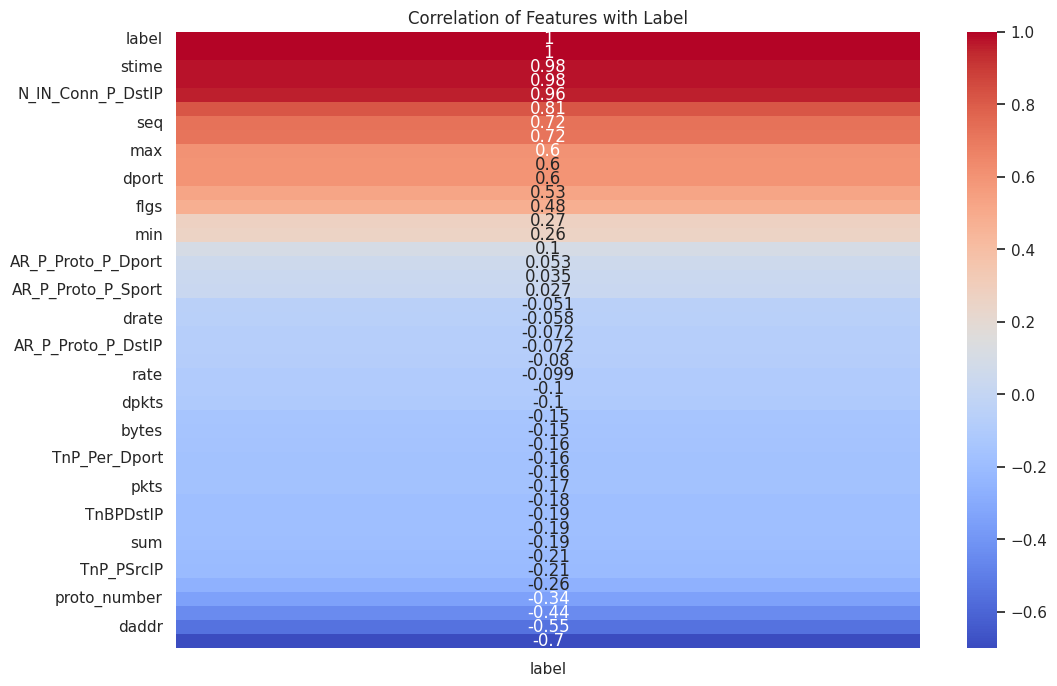

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add label to dataset if removed
df_for_leak_check = balanced_df.copy()
df_for_leak_check['label'] = y_final

# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df_for_leak_check.corr(numeric_only=True)
sns.heatmap(corr[['label']].sort_values(by='label', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Label")
plt.show()


In [34]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# STEP 1: Drop leaky features
leaky_features = ['stime', 'N_IN_Conn_P_DstIP', 'seq']
df_cleaned = df.drop(columns=leaky_features, errors='ignore')

# STEP 2: Separate X and y
X = df_cleaned.drop('attack', axis=1)
y = df_cleaned['attack']

# STEP 3: Encode labels (if needed)
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# STEP 4: Encode all non-numeric columns in X
non_numeric = X.select_dtypes(include='object').columns
for col in non_numeric:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# STEP 5: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 6: Feature selection (Embedded method)
selector = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))
X_selected = selector.fit_transform(X_scaled, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:\n", selected_features.tolist())

# STEP 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# STEP 8: Train classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# STEP 9: Evaluate accuracy
print("Accuracy After Cleaning & Feature Selection:", accuracy_score(y_test, y_pred))


Selected Features:
 ['proto_number', 'saddr', 'daddr', 'state', 'state_number', 'ltime', 'dur', 'TnBPDstIP', 'TnP_PerProto', 'category', 'subcategory']
Accuracy After Cleaning & Feature Selection: 1.0
